In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("👽 Hello.")

👽 Hello.


In [243]:
import os

csv_file_path = 'D:/dev/Python/Python/data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


### LEARN
- [Missing_data](#결측치), [Duplicated](#Duplicated) 중복된 데이터를 찾아 제거할 수 있고, 결측치(missing data)를 제거하거나 채워 넣을 수 있다.
- [Normalization](#Normalization) 데이터를 정규화시킬 수 있다.
- [Outlier](#Outlier) 이상치(outlier)를 찾고, 이를 처리할 수 있다.
- [원-핫 인코딩](#One-Hot_encoding)범주형 데이터를 원-핫 인코딩할 수 있다.
- [Binning](#Binning,Bucketing)연속적인 데이터를 구간으로 나눠 범주형 데이터로 변환할 수 있다.

[TODO](#TODO)

[참고](http://colingorrie.github.io/outlier-detection.html#z-score-method)

#### 결측치

In [244]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


In [245]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [246]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [247]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [248]:
trade.isnull().any(axis=1) # 하나라도 False인지 check!

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [249]:
trade[trade.isnull().any(axis=1)] # 하나라도 False인지 check!

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [250]:
# how , 전부 False..
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


-  How to fill NA

시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다. 예를 들어 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완할 수 있습니다

In [251]:
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [252]:
trade.loc[191,'수출금액'] = (trade.loc[188,"수출금액"] + trade.loc[194,"수출금액"])/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [253]:
# index 191의 무역수지 컬럼은 수출금액과 수입금액의 차이를 이용하여 채우도록 하겠습니다.

trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'] 
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


#### Duplicated

In [16]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [17]:
trade[trade.duplicated()] # 중국 중복

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [19]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')] # check

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [20]:
trade.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


#### Outlier

In [21]:
# z-score/ 표준정규분포..?
def outlier(df,col,z): # z: 기준
    return df[abs(df[col] - np.mean(df[col]))/ np.std(df[col]) > z].index


In [22]:
trade.loc[outlier(trade, '무역수지', 1.5)] # 무역수지 기준/ z = 1.5

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [23]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [24]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [25]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [26]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


- IQR은 제 3사분위수에서 제 1사분위 값을 뺀 값으로 데이터의 중간 50%의 범위라고 생각하시면 됩니다. Q_1 - 1.5*IQRQ 
1
​
 −1.5∗IQR보다 왼쪽에 있거나, Q_3 + 1.5*IQRQ 
3
​
 +1.5∗IQR 보다 오른쪽에 있는 경우 우리는 이상치라고 판단합니다.

In [27]:
# IQR method
np.random.seed(2020)
data = np.random.randn(100) # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8,10,-3,-5])))  # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

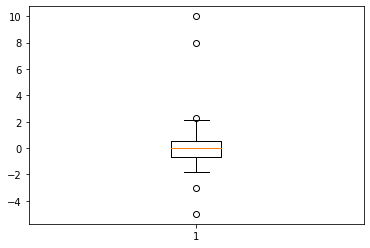

In [28]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [29]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [41]:
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

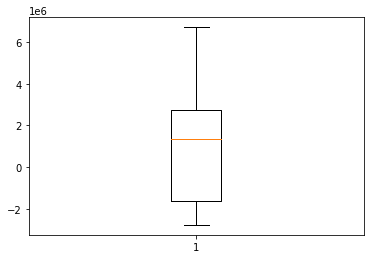

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [49]:
# outlier with IQR
def outlier2(df, col):
    fig, ax = plt.subplots()
    ax.boxplot(df[col])
    plt.show()
    
    q3,q1 = np.percentile(df[col], [75 ,25])
    IQR = q3 - q1
    start = q1-1.5*IQR
    end = q3+1.5*IQR
    return df[(df[col] > start) | (df[col] < end)]
outlier2(trade, '무역수지')

#### Normalization

- 표준화 & Min-Max Scaling

표준화: 데이터의 평균은 0 분산은 1로 변환

Min-Max Scaling: 데이터의 최솟값은 0, 최댓값은 1로 변환 
    __(X-X_min)/(X_MAX - X_min)__



In [50]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


In [51]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


In [52]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


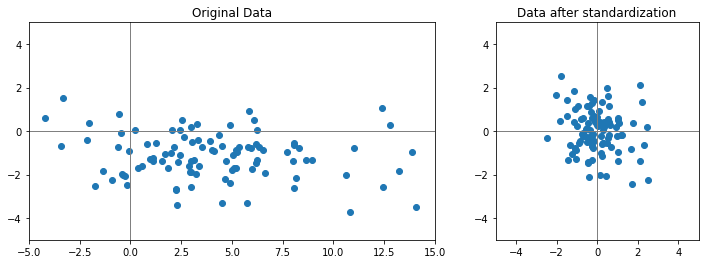

In [53]:
# 표준화
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

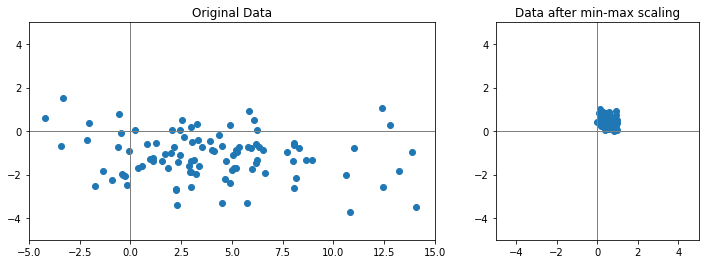

In [54]:
# min-max scaling
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [58]:
# my data "trade"
display(trade.head())
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'] 
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std() # ?? 이게 가능하네..
trade_Standardization.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [59]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,5.921189e-17,6.091993e-17,-8.312439e-17,3.074464e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


In [60]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [61]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [69]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [70]:
scaler.transform(test)

array([[-0.25,  0.55]])

#### One-Hot Encoding

In [71]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [72]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


In [73]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


#### Binning,Bucketing
- cut,qcut을 이용해 수치형 데이터를 범주형 데이터로

In [74]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

<AxesSubplot:>

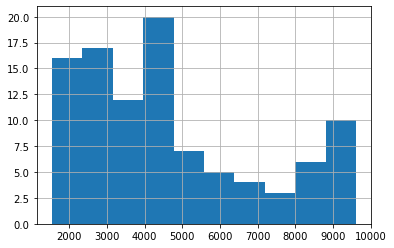

In [75]:
salary.hist()

In [78]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
ctg = pd.cut(salary, bins=bins)
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [79]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [80]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [81]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

In [82]:
ctg = pd.qcut(salary, q=5) #qcut의 경우에은 데이터의 분포를 비슷한 크기의 그룹으로 나눠준다.
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [83]:
print(ctg.value_counts().sort_index())

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64


## TODO

Data: vgsales.csv<br></bt>
Python: 3.9.0<br></bt>
Pandas: 1.3.4

- 결측치(Missing Data) ✔ 
- 중복된 데이터 ✔
- 이상치(Outlier) ✔
- 정규화(Normalization) ✔ 
- 원-핫 인코딩(One-Hot Encoding) ✔ 
- 구간화(Binning) "Skip"

[데이터 출처](https://www.kaggle.com/gregorut/videogamesales)

### 1. Data

In [254]:
path = "D:/dev/Python/Python/data/vgsales.csv"
df = pd.read_csv(path)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [256]:
df.isnull().sum() # Year,Publisher

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [258]:
df[df.isnull().any(axis=1)] # check NA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [259]:
# Publisher: NA의 경우 UNKNOWN으러..


idx = df[df["Publisher"].isnull() == True].index
df.loc[idx, "Publisher"] = "Unknown"
df["Publisher"].isnull().sum()

0

In [260]:
#Year에 대한 처리..
# 1. 시계열 분석을 하지 않으면 Year컬럼을 지워도 무방할 듯하다.(Unknowun&Na가 많다.)
# 2. 대채 값을 찾기 어려움, 개인적인 생각으로 게임 Platform별 가장 많이 출시된 년도를 사용하면 괜찮을듯.


# 먼저 "Na"를 전부 "Unknown"으로
idx = df[(df["Year"].isnull() == True) | (df["Year"] == "Unknown")].index
df.loc[idx, "Year"] = "0" # type 맞추기
df["Year"].isnull().sum()

0

In [285]:
# Platform 별 년평균..
n_df = df[df["Year"] != 0] # 0이 들어가면 평균 값이 이상해짐
n_df["Year"] = n_df["Year"].astype(float)
plf_mean_by_year = n_df.groupby("Platform")["Year"].mean().apply(lambda x: round(x, 0)).reset_index()
plf_mean_by_year.set_index("Platform", inplace=True)

In [290]:
plf_mean_by_year.index

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

In [295]:
# 이제 각 플랫폼 별 Year가 0인 값들을 평균값으로 대채

for col in plf_mean_by_year.index:
    
    for plf, idx in zip(df[df["Year"] == "0"]["Platform"],df[df["Year"] == "0"]["Platform"].index):
        if col == plf:
            df.loc[idx,"Year"] = str(plf_mean_by_year.loc[col][0])

In [296]:
df.Year.unique() # no more zeros

array([2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0,
       1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0,
       2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0,
       1993.0, 1994.0, 1982.0, 2003.0, 1986.0, 2000.0, '1973.0', 1995.0,
       2016.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0, '1956.0', '1729.0',
       '1962.0', '1976.0', '1986.0', '1982.0', '1953.0', '1980.0',
       '1977.0', '2009.0', 2020.0, 2017.0], dtype=object)

In [208]:
df.duplicated().sum() # 중복 x

0

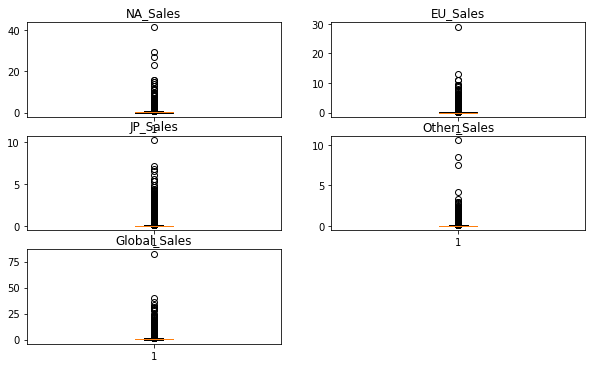

In [330]:
# 이상치
num_cols = ['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

plt.figure(figsize=(10,8))
for i,col in enumerate(num_cols):
    ax = plt.subplot(4,2,i+1)
    plt.title(col)
    ax.boxplot(df[col])
    
plt.show()

# 그래프가 거의 다 밀집되어있다.. 몇개들만 없애주면 될듯..
# +log 스케일도 하면 좋을듯 하지만... 귀찮..

In [335]:
# 각 그래프마다 크게 보이는 이상치들만 제거

df[df["NA_Sales"]>20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [336]:
df[df["EU_Sales"]>20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [338]:
df[df["JP_Sales"]>8]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


In [340]:
df[df["Other_Sales"]>7]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66


In [342]:
df[df["Global_Sales"]>75]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [344]:
# 이상치 인덱스
idx= [0,17,47,4,1,5,9] # 총 7개
df.drop(index=idx, inplace=True)

In [346]:
df.reset_index(drop=True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
...,...,...,...,...,...,...,...,...,...,...,...
16586,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16587,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16588,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16589,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


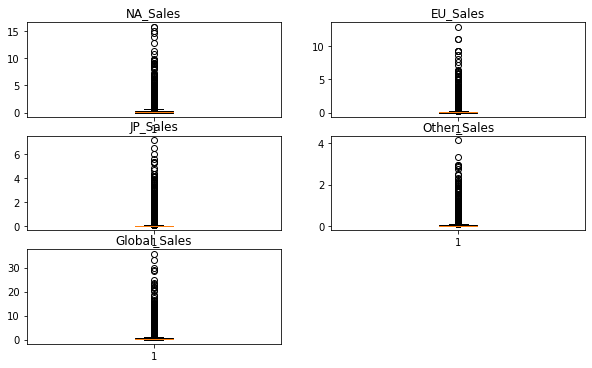

In [410]:
# 이상치
num_cols = ['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

plt.figure(figsize=(10,8))
for i,col in enumerate(num_cols):
    ax = plt.subplot(4,2,i+1)
    plt.title(col)
    ax.boxplot(df[col])
    
plt.show()

In [412]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for_norm = df.iloc[:,6:]
for_norm

df_output = fitted.fit_transform(for_norm)
df_output = pd.DataFrame(df_output, columns= for_norm.columns)
df_output



,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.000000,1.000000,0.526389,0.799517,1.000000
1,0.993691,0.854814,0.455556,0.714976,0.921251
2,0.717981,0.716615,0.902778,0.700483,0.837755
3,0.885174,0.714286,0.406944,0.688406,0.810109
4,0.920505,0.548137,0.652778,0.545894,0.798939
...,...,...,...,...,...
16586,0.000631,0.000000,0.000000,0.000000,0.000000
16587,0.000631,0.000000,0.000000,0.000000,0.000000
16588,0.000000,0.000000,0.000000,0.000000,0.000000
16589,0.000000,0.000776,0.000000,0.000000,0.000000


In [386]:
df_output.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16591.000000,16591.000000,16591.000000,16591.000000,16591.000000
mean,0.016156,0.011181,0.010583,0.011187,0.014322
std,0.041242,0.034689,0.040454,0.035129,0.036701
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.001396
50%,0.005047,0.001553,0.000000,0.002415,0.004468
75%,0.015142,0.008540,0.005556,0.008454,0.012846
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [399]:
df.reset_index(drop=True,inplace=True)

# 데이터 cocat
scale_df = pd.concat([df[["Name","Platform","Year","Genre","Publisher"]],df_output], axis = 1)

In [405]:
# 원핫 인코딩

platform = pd.get_dummies(df["Platform"])
platform.reset_index(drop=True)

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16587,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16589,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [406]:
scael_ohe_df = pd.concat([scale_df,platform], axis=1)
scael_ohe_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,1.000000,1.000000,0.526389,0.799517,1.000000,...,0,0,0,0,0,1,0,0,0,0
1,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.993691,0.854814,0.455556,0.714976,0.921251,...,0,0,0,0,0,1,0,0,0,0
2,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,0.717981,0.716615,0.902778,0.700483,0.837755,...,0,0,0,0,0,0,0,0,0,0
3,Wii Play,Wii,2006.0,Misc,Nintendo,0.885174,0.714286,0.406944,0.688406,0.810109,...,0,0,0,0,0,1,0,0,0,0
4,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,0.920505,0.548137,0.652778,0.545894,0.798939,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.000631,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
16587,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.000631,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
16588,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
16589,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.000000,0.000776,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
